In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
from src import Spotify
from urllib.parse import urlencode, urlparse
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
sp = Spotify()

sp.search()
sp.get_genres()
sp.get_features()
sp.get_recommend(get_bak=True)

reco_sp = Spotify(sp.reco_tracks)
reco_sp.get_features()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


In [3]:
sp.sel_tracks.head()

,trackId,trackName,artistIds,artistNames,image
0,3w9HSuLDejveVS9G8Qj8i0,Beer (Prod.Way Ched),0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b27388875b...
1,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo,https://i.scdn.co/image/ab67616d0000b27380af1b...
2,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2738c0def...
3,6guxIn9kHpncfdkrXn2CIQ,Blue Room,3rxeQlsv0Sc2nyYaZ5W71T,Chet Baker,https://i.scdn.co/image/ab67616d0000b2734ca893...


In [39]:
sp.genres

,artistIds,genres
0,0LyfQWJT6nXafLPZqxe9Of,jazz
1,5a8EJtOEbUJDF4RX3mKK02,"k-pop,hip-hop"
2,4XDi67ZENZcbfKnvMnTYsI,"k-pop,pop,hip-hop"
3,3rxeQlsv0Sc2nyYaZ5W71T,jazz


In [4]:
reco_sp.sel_tracks.head()

,trackId,trackName,artistIds,artistName,image,seedId
0,50c0knPGjaJAuE4hRg28Qq,Quando Você Olha Pra Ela,1b8kpp4DUwt1hWaxTiWQhD,Gal Costa,https://i.scdn.co/image/ab67616d0000b273128778...,3w9HSuLDejveVS9G8Qj8i0
1,267lVml7gJ9xefwgO6E2Ag,Shhh / Peaceful,0kbYTNQb4Pb1rPbbaF0pT4,Miles Davis,https://i.scdn.co/image/ab67616d0000b2737a4a3c...,3w9HSuLDejveVS9G8Qj8i0
2,11vaRXRIFXJTRr3BuzNbk5,"He's Younger Than You Are - From ""Alfie"" Score",1VEzN9lxvG6KPR3QQGsebR,Sonny Rollins,https://i.scdn.co/image/ab67616d0000b273f7efcb...,3w9HSuLDejveVS9G8Qj8i0
3,4dKYLUMalJeUiXyhHPZbpw,Stranger on the Shore,1ji3dMtmN0ZHKrGTzLbfbO,Acker Bilk & His Paramount Jazz Band,https://i.scdn.co/image/ab67616d0000b2731f332d...,3w9HSuLDejveVS9G8Qj8i0
4,2iGE15tDX1YR1uegNyxaB3,wish,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273e0891e...,3w9HSuLDejveVS9G8Qj8i0


In [24]:
from sklearn.metrics import euclidean_distances as euc

my_features = sp.features.iloc[:, 1:].to_numpy()
reco_features = reco_sp.features.iloc[:,1:].to_numpy()

all_features = np.append(my_features, reco_features, axis=0)
_min = all_features.min(axis=0)
_max = all_features.max(axis=0)

_my_features = (my_features - _min) / (_max - _min)
_reco_features = (reco_features - _min) / (_max - _min)

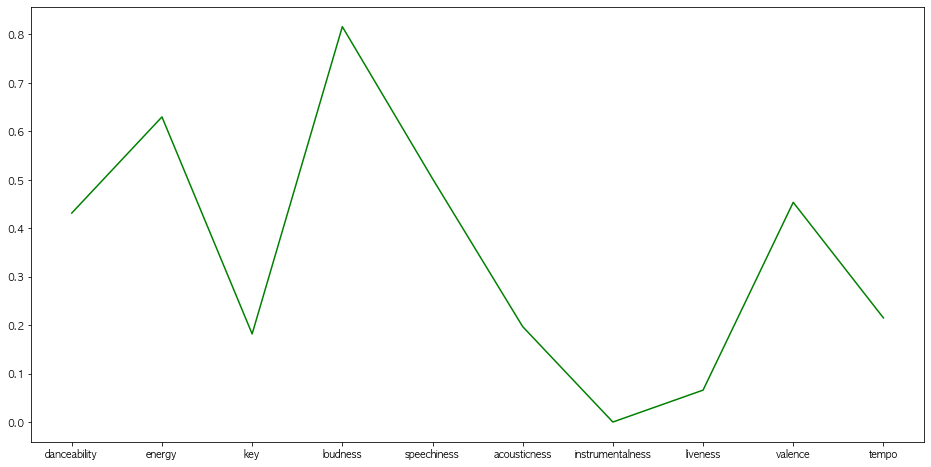

In [38]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.plot(sp.features.columns[1:],_my_features[2], color='g')

# plt.savefig("./visual_images/audio-features-ex.png", transparent=True)
plt.show()

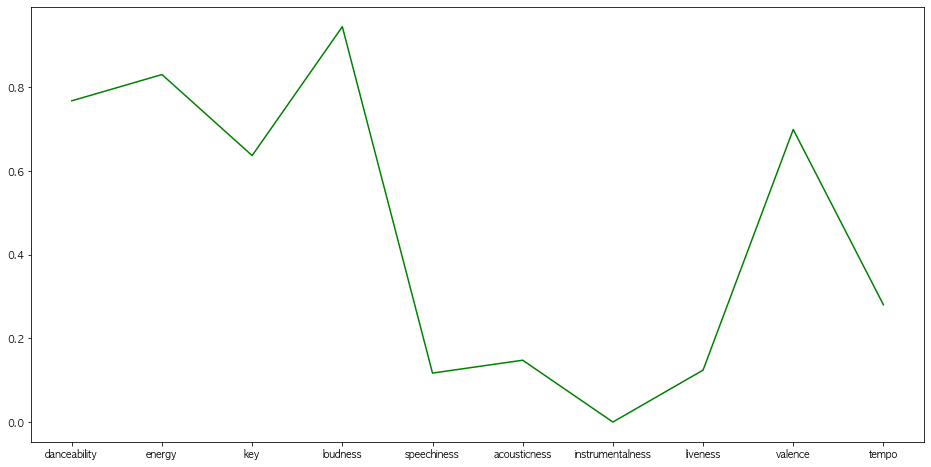

In [7]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

plt.plot(sp.features.columns[1:],_my_features[1], color='g')

# plt.savefig("./visual_images/audio-features-ex.png", transparent=True)
plt.show()

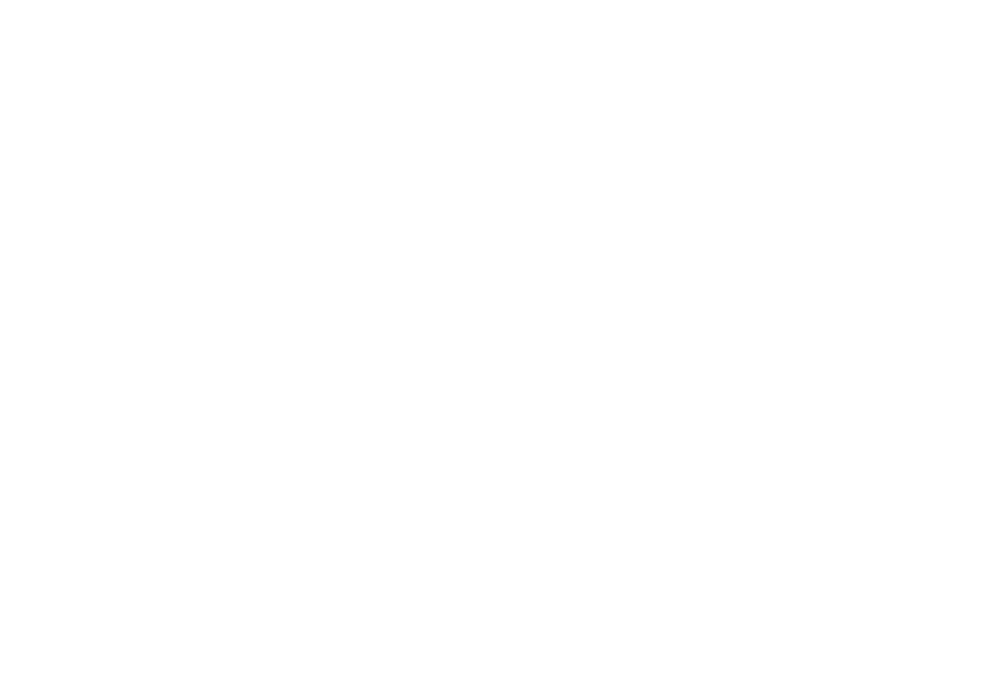

In [25]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.barh(sp.features.columns[1:],_my_features[0], color='white')

plt.savefig("./visual_images/audio-features-ex.png", transparent=True)

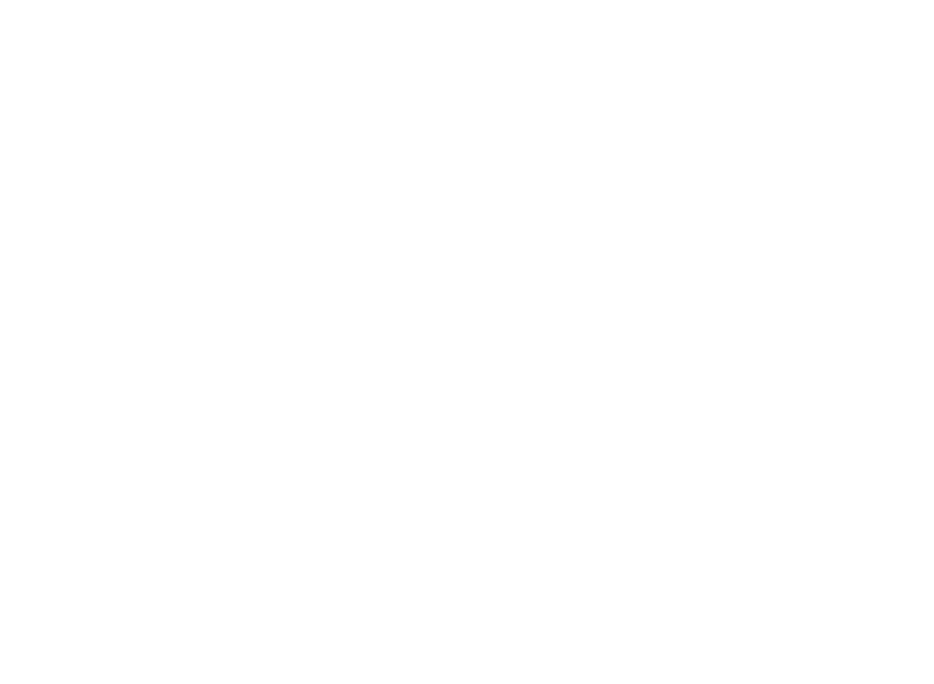

In [26]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],reco_features.T, color='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],my_features.T, color='white', linewidth=2)

plt.savefig("./visual_images/min-max-norm-ex.png", transparent=True)

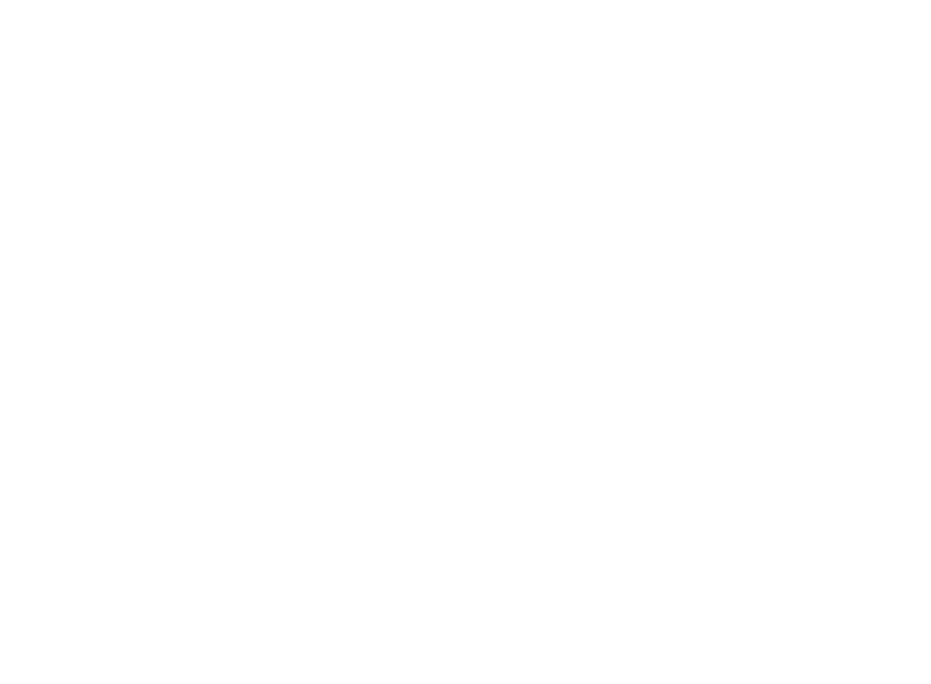

In [27]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],_reco_features.T, color='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],_my_features.T, color='white', linewidth=2)

plt.savefig("./visual_images/euc-ex.png", transparent=True)

In [40]:
chk = euc(_my_features, _my_features)
chk_idxes = chk[chk != 0].reshape(-1,len(my_features) - 1).mean(axis=1).argsort()
chk_idxes

array([2, 0, 1, 3])

In [42]:
chk.mean(axis=0)

array([0.73211663, 0.82205822, 0.69150267, 1.22251392])

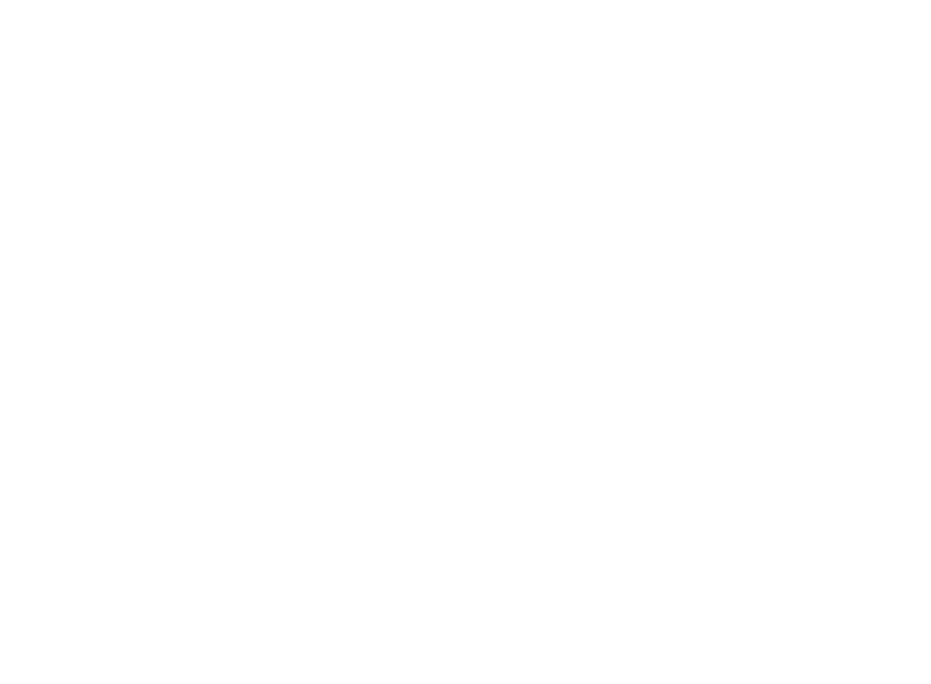

In [29]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],_reco_features.T, c='white', linewidth=0.05)
plt.plot(sp.features.columns[1:],_my_features.T, c='white', linewidth=1)

plt.savefig("./visual_images/before-filtering.png", transparent=True)

In [30]:
chk_features = reco_sp.sel_tracks.copy()
chk_features.reset_index(inplace=True)
chk_features.drop("index", axis=1, inplace=True)
chk_features['similarity'] = euc(_reco_features,_my_features).mean(axis=1)

chk_features.head()

,trackId,trackName,artistIds,artistName,image,seedId,similarity
0,50c0knPGjaJAuE4hRg28Qq,Quando Você Olha Pra Ela,1b8kpp4DUwt1hWaxTiWQhD,Gal Costa,https://i.scdn.co/image/ab67616d0000b273128778...,3w9HSuLDejveVS9G8Qj8i0,1.181731
1,267lVml7gJ9xefwgO6E2Ag,Shhh / Peaceful,0kbYTNQb4Pb1rPbbaF0pT4,Miles Davis,https://i.scdn.co/image/ab67616d0000b2737a4a3c...,3w9HSuLDejveVS9G8Qj8i0,1.127070
2,11vaRXRIFXJTRr3BuzNbk5,"He's Younger Than You Are - From ""Alfie"" Score",1VEzN9lxvG6KPR3QQGsebR,Sonny Rollins,https://i.scdn.co/image/ab67616d0000b273f7efcb...,3w9HSuLDejveVS9G8Qj8i0,1.299918
3,4dKYLUMalJeUiXyhHPZbpw,Stranger on the Shore,1ji3dMtmN0ZHKrGTzLbfbO,Acker Bilk & His Paramount Jazz Band,https://i.scdn.co/image/ab67616d0000b2731f332d...,3w9HSuLDejveVS9G8Qj8i0,1.370490
4,2iGE15tDX1YR1uegNyxaB3,wish,3hvinNZRzTLoREmqFiKr1b,CHANGMO,https://i.scdn.co/image/ab67616d0000b273e0891e...,3w9HSuLDejveVS9G8Qj8i0,0.886472


In [31]:
print("필터링 전 평균 유사도",chk_features['similarity'].mean())

필터링 전 평균 유사도 1.0891038680616119


In [32]:
chk_features.sort_values(by=['similarity'])[:3]

,trackId,trackName,artistIds,artistName,image,seedId,similarity
117,1hqukerMJf9N1qHo2sijii,To Life,4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b273978aeb...,2SMq0lOqCTHayWa9juoI0d,0.744070
73,4M9NbNJnOpVCN5jbNln2TJ,SUMMERIDE,4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2733b6cb6...,3w9HSuLDejveVS9G8Qj8i0,0.767031
241,2vzn8usBcuNL93DnTjEK0z,LOSER,4Kxlr1PRlDKEB0ekOCyHgX,BIGBANG,https://i.scdn.co/image/ab67616d0000b273fd0d9a...,5quFr5s5PXYfUX5jV2EBZ1,0.789916


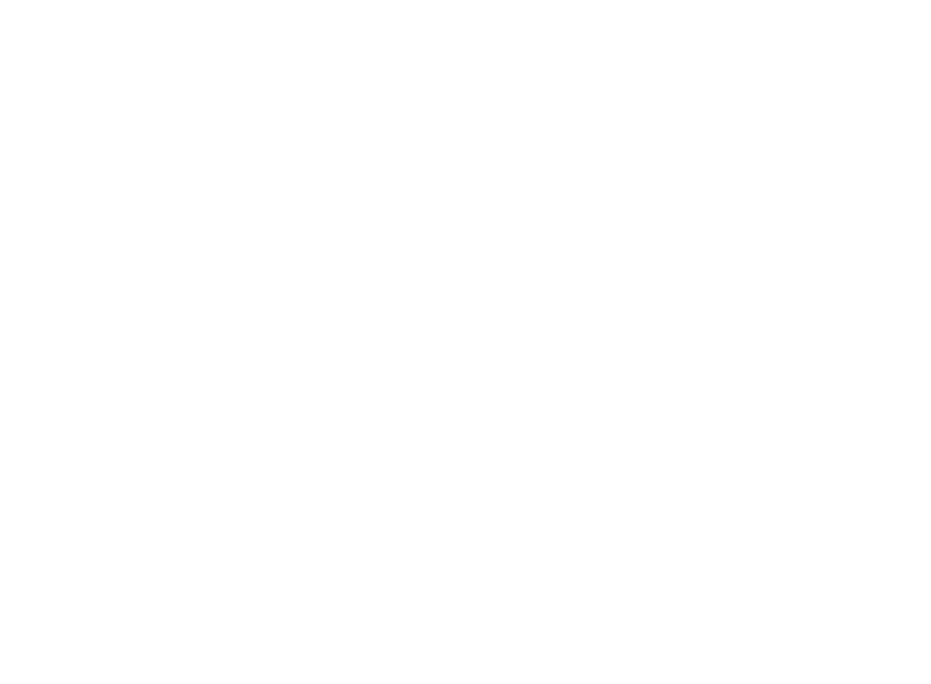

In [33]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.plot(sp.features.columns[1:],
         _reco_features[chk_features.sort_values(by=['similarity'])[:100].index].T, c='white', linewidth=0.1)
plt.plot(sp.features.columns[1:],
         _my_features[chk_idxes[:]].T, c='white', linewidth=1)

plt.savefig("./visual_images/after-filtering.png", transparent=True)

In [34]:
print("필터링 후 평균 유사도",chk_features.sort_values(by=['similarity'])[:100]['similarity'].mean())

필터링 후 평균 유사도 0.8716046003973136


In [35]:
chk_features.sort_values(by='similarity')[:100]['seedId'].value_counts()

5quFr5s5PXYfUX5jV2EBZ1    44
2SMq0lOqCTHayWa9juoI0d    33
3w9HSuLDejveVS9G8Qj8i0    20
6guxIn9kHpncfdkrXn2CIQ     3
Name: seedId, dtype: int64